# Model 2

Used to justify the existense of 2-year cycling predators (of emerged cicadas i.e. above ground predators).  

"there is little field data to argue the existence of perfect 2 and 3 year cycling cicada predators
([11])"

-> Use model to justify existense of *quasi*-cycles. (i.e. damped or transient)

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import copy

In [184]:
class Model2:
    def __init__(self, a, s, g1, g2):
        self.a = a
        self.s = s
        self.g1 = g1
        self.g2 = g2
        
    def w(self, t, p, U):
        g = self.g2 if (t % p) == 0 else self.g1
        
        return g*math.exp(-self.s*(U[0] + U[1]))
    
    def G(self, t, p, U):
        return [self.a*U[1], self.w(t, p, U)*U[0]]
    
    def simulate(self, p, U_init, tmax):
        Ut = U_init
        U = [Ut]
        for t in range(1, tmax):
            Ut = self.G(t, p, Ut)
            U.append(Ut)
            
        return U
     
    def plot(self, U, p, tmax):
        U = np.array(U).sum(axis=1)
        
        f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(24,3))
        a0.plot(U, '.')
        if p != 1:
            for t in range(0, tmax, p):
                a0.axvline(t)
        a0.set_ylim([0.98, 1.06])
        a0.set_yticks(np.linspace(0.99, 1.05, 7))
        a0.set_title(f"p == {p}")
        
        # limit cycle
        start = (tmax // p) * (p-1)
        a1.plot(U[start: start+p], 'o')
        a1.set_ylim([0.98, 1.06])
        a1.set_yticks(np.linspace(0.99, 1.05, 7))
        a1.set_title(f"limit cycle for p == {p}")
        plt.show()

In [185]:
DEFAULT_NO_CICADA_PARAMS = {
    'a': 1.4,
    's':  0.088,
    'g1': 0.78,
    'g2': 0.78,
    'U_init': [0.56, 0.43]
}

DEFAULT_CICADA_PARAMS = {
    'a': 1.4,
    's':  0.088,
    'g1': 0.78,
    'g2': 0.80,
    'U_init': [0.56, 0.44]
}

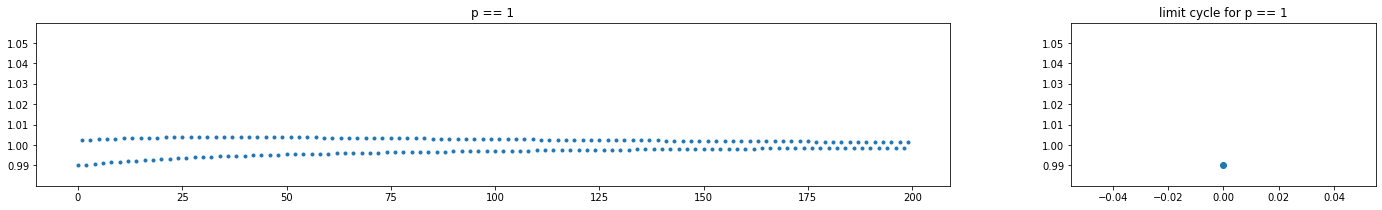

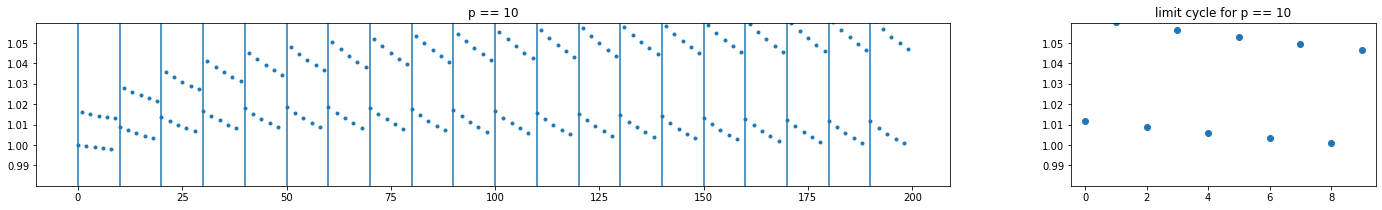

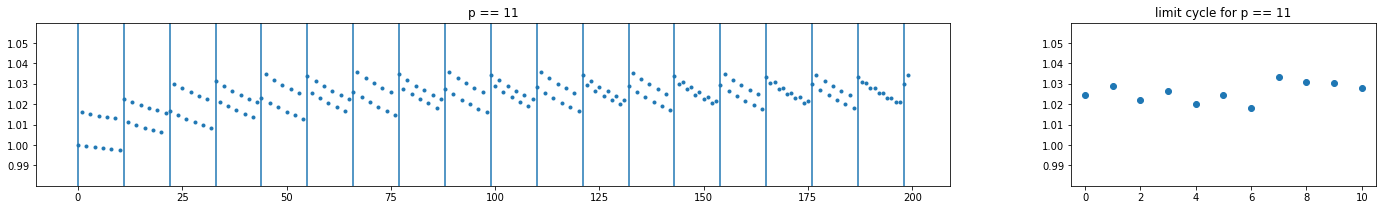

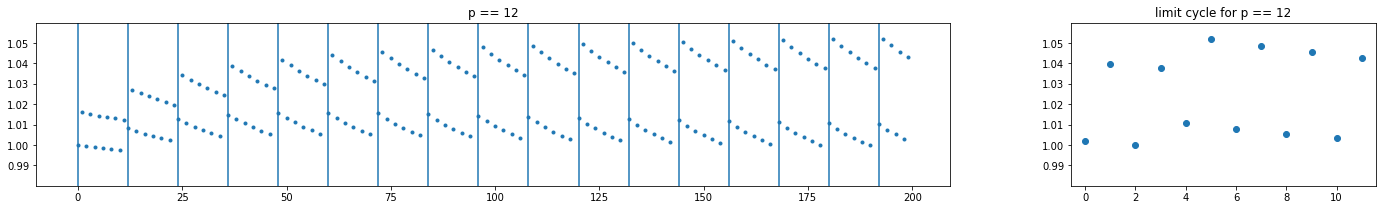

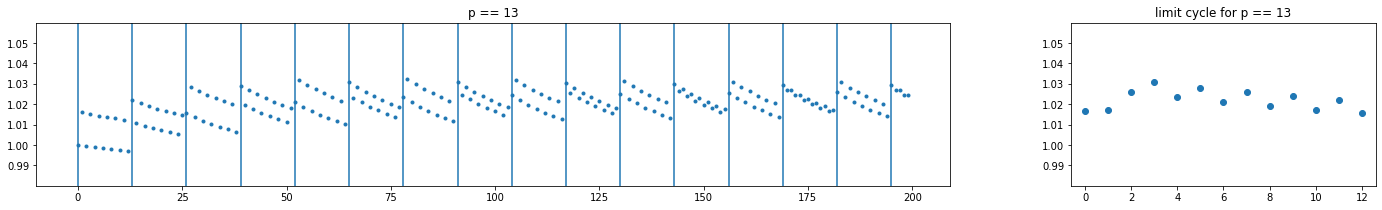

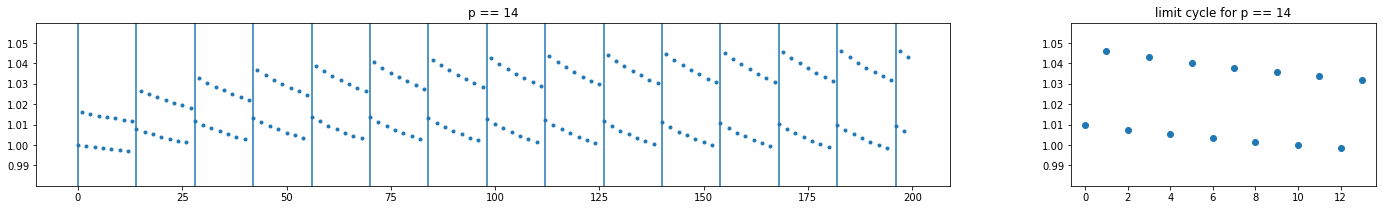

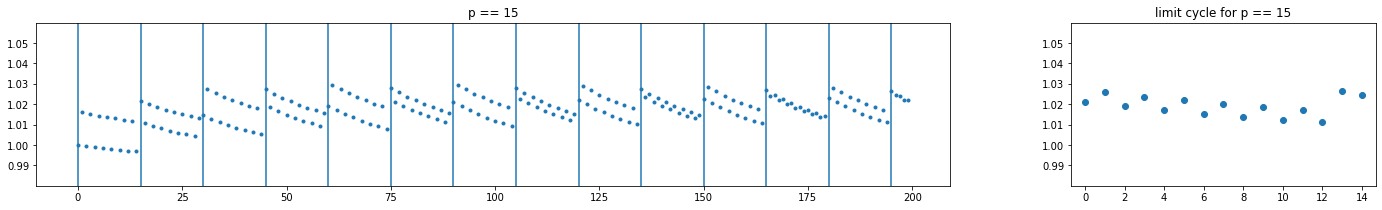

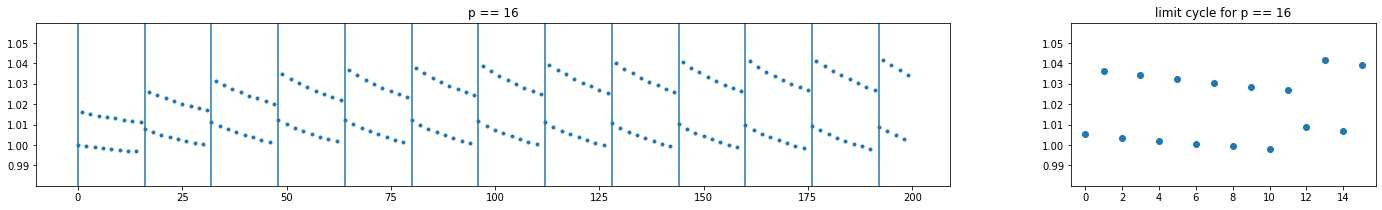

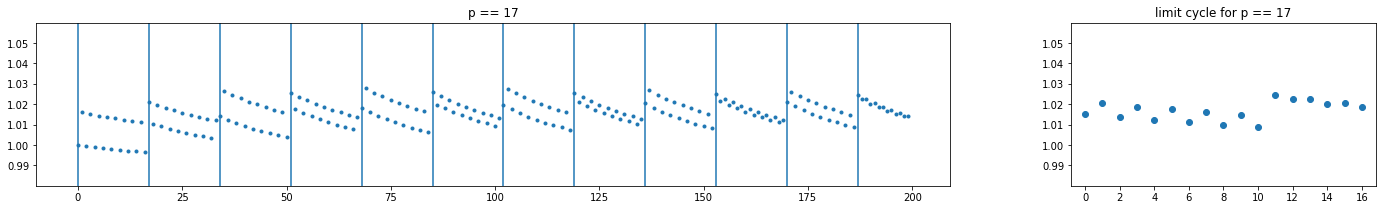

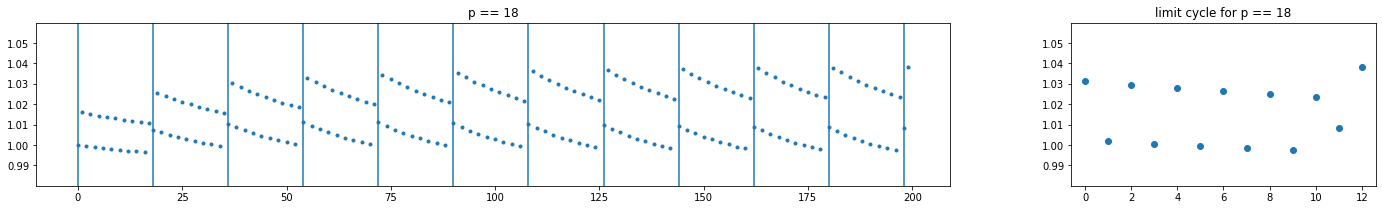

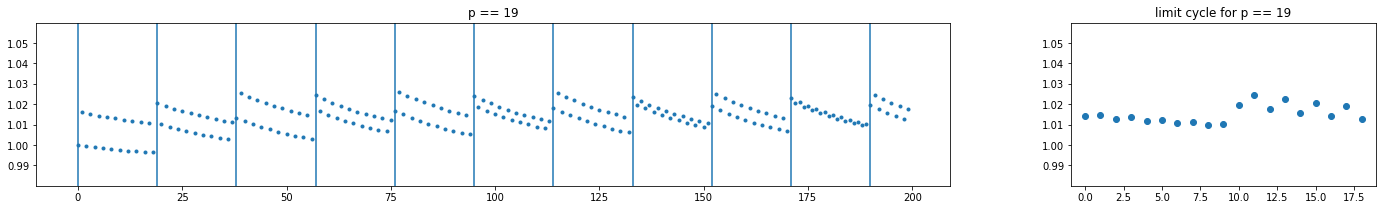

In [186]:
a, s, g1, g2, U_init = DEFAULT_NO_CICADA_PARAMS.values()
M = Model2(a, s, g1, g2)

p = 1; tmax = 200
U = M.simulate(p, U_init, tmax)
M.plot(U, p, tmax)

a, s, g1, g2, U_init = DEFAULT_CICADA_PARAMS.values()
M = Model2(a, s, g1, g2)

for p in [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]:
    U = M.simulate(p, U_init, tmax)
    M.plot(U, p, tmax)